# Summary:
1. Data auditing and creation of derived variables for analysis
2. Correlation analysis
3. Network Traffic Reclassification Using IANA Repository
4. RFM-based customer segmentation modelling

## Data Audit

In [ ]:
# import libraries
import numpy as np
import pandas as pd

In [ ]:
sample_df = pd.read_csv('18.csv')[:-3]

In [ ]:
sample_df.tail()

,ts,te,td,sa,da,sp,dp,pr,flg,fwd,...,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
674917,2/8/22 18:54,2/8/22 18:54,0.01,79.124.62.130,192.139.122.147,52298,19210,TCP,CEUAP.S.,0,...,0-0-0,0-0-0,0-0-0,0,0,0,208.66.250.43,0/0,9,54:57.8
674918,2/8/22 18:47,2/8/22 18:47,0.01,208.66.248.106,142.251.33.78,57084,443,UDP,........,0,...,0-0-0,0-0-0,0-0-0,0,0,0,208.66.250.41,0/0,7,47:19.8
674919,2/8/22 18:59,2/8/22 18:59,0.98,208.66.251.130,52.60.150.191,16993,53,UDP,........,0,...,0-0-0,0-0-0,0-0-0,0,0,0,208.66.250.43,0/0,9,59:42.9
674920,2/8/22 18:40,2/8/22 18:40,0.04,79.124.62.34,208.66.248.41,53543,1136,TCP,...A.RS.,0,...,0-0-0,0-0-0,0-0-0,0,0,0,208.66.250.43,0/0,1,40:41.5
674921,2/8/22 18:43,2/8/22 18:43,0.00,192.139.156.145,120.39.210.64,0,0,ICMP,........,0,...,0-0-0,0-0-0,0-0-0,0,0,0,208.66.250.43,0/0,9,43:55.7


In [ ]:
sample_df.columns

Index(['ts', 'te', 'td', 'sa', 'da', 'sp', 'dp', 'pr', 'flg', 'fwd', 'stos',
       'ipkt', 'ibyt', 'opkt', 'obyt', 'in', 'out', 'sas', 'das', 'smk', 'dmk',
       'dtos', 'dir', 'nh', 'nhb', 'svln', 'dvln', 'ismc', 'odmc', 'idmc',
       'osmc', 'mpls1', 'mpls2', 'mpls3', 'mpls4', 'mpls5', 'mpls6', 'mpls7',
       'mpls8', 'mpls9', 'mpls10', 'cl', 'sl', 'al', 'ra', 'eng', 'exid',
       'tr'],
      dtype='object')

In [ ]:
# drop columns
sample_df.drop(columns=['fwd','sas','smk','dmk','das','dtos','nh','nhb','mpls1','mpls2','mpls2','mpls3','mpls4','mpls5','mpls6','mpls7','mpls8','mpls9','mpls10','cl','sl','al','exid','eng','stos','ra','tr'], inplace=True)


In [ ]:
sample_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,obyt,in,out,dir,svln,dvln,ismc,odmc,idmc,osmc
0,2/8/22 18:54,2/8/22 18:54,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,0,12,15,0,0,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93
1,2/8/22 18:42,2/8/22 18:42,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,2886,15728709,16,0,0,0,00:00:00:00:00:00,8c:90:d3:90:4c:6d,00:00:00:00:00:00,74:4d:28:64:76:9c
2,2/8/22 18:41,2/8/22 18:41,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,0,12,15,0,0,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93
3,2/8/22 18:37,2/8/22 18:37,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,576,12,15,0,0,0,c4:ad:34:51:33:93,5e:f8:8b:ab:49:c7,c4:ad:34:51:33:93,c4:ad:34:51:33:93
4,2/8/22 18:43,2/8/22 18:43,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,7504,52,12,0,0,0,00:00:5e:00:01:0b,b8:69:f4:83:d6:11,00:00:5e:00:01:0b,c4:ad:34:51:33:93


In [ ]:
# datatypes
sample_df.dtypes

ts       object
te       object
td      float64
sa       object
da       object
sp        int64
dp        int64
pr       object
flg      object
ipkt      int64
ibyt      int64
opkt      int64
obyt      int64
in        int64
out       int64
dir       int64
svln      int64
dvln      int64
ismc     object
odmc     object
idmc     object
osmc     object
dtype: object

In [ ]:
# convert ts, te, tr to datetime format, sp and dp to object
sample_df['ts'] = pd.to_datetime(sample_df['ts'])
sample_df['te'] = pd.to_datetime(sample_df['te'])
sample_df['sp'] = sample_df['sp'].astype(object)
sample_df['dp'] = sample_df['dp'].astype(object)
sample_df['obyt']=sample_df['obyt'].astype(int)
sample_df['ibyt']=sample_df['ibyt'].astype(int)
sample_df['opkt']=sample_df['opkt'].astype(int)
sample_df['ipkt']=sample_df['ipkt'].astype(int)
sample_df['td']=sample_df['td'].astype(float)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674922 entries, 0 to 674921
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ts      674922 non-null  datetime64[ns]
 1   te      674922 non-null  datetime64[ns]
 2   td      674922 non-null  float64       
 3   sa      674922 non-null  object        
 4   da      674922 non-null  object        
 5   sp      674922 non-null  object        
 6   dp      674922 non-null  object        
 7   pr      674922 non-null  object        
 8   flg     674922 non-null  object        
 9   ipkt    674922 non-null  int64         
 10  ibyt    674922 non-null  int64         
 11  opkt    674922 non-null  int64         
 12  obyt    674922 non-null  int64         
 13  in      674922 non-null  int64         
 14  out     674922 non-null  int64         
 15  dir     674922 non-null  int64         
 16  svln    674922 non-null  int64         
 17  dvln    674922 non-null  int6

In [ ]:
# checking for null
sample_df.isnull().values.any()

False

In [ ]:
# checking for duplicated values
sample_df.duplicated().values.any()

False

In [ ]:
sample_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,obyt,in,out,dir,svln,dvln,ismc,odmc,idmc,osmc
0,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,0,12,15,0,0,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93
1,2022-02-08 18:42:00,2022-02-08 18:42:00,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,2886,15728709,16,0,0,0,00:00:00:00:00:00,8c:90:d3:90:4c:6d,00:00:00:00:00:00,74:4d:28:64:76:9c
2,2022-02-08 18:41:00,2022-02-08 18:41:00,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,0,12,15,0,0,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93
3,2022-02-08 18:37:00,2022-02-08 18:37:00,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,576,12,15,0,0,0,c4:ad:34:51:33:93,5e:f8:8b:ab:49:c7,c4:ad:34:51:33:93,c4:ad:34:51:33:93
4,2022-02-08 18:43:00,2022-02-08 18:43:00,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,7504,52,12,0,0,0,00:00:5e:00:01:0b,b8:69:f4:83:d6:11,00:00:5e:00:01:0b,c4:ad:34:51:33:93


In [ ]:
# create new fields for start time and start date
sample_df['start_date'] = [d.date() for d in sample_df['ts']]
sample_df['start_time'] = [d.time() for d in sample_df['ts']]

In [ ]:
sample_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,out,dir,svln,dvln,ismc,odmc,idmc,osmc,start_date,start_time
0,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,15,0,0,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:54:00
1,2022-02-08 18:42:00,2022-02-08 18:42:00,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,16,0,0,0,00:00:00:00:00:00,8c:90:d3:90:4c:6d,00:00:00:00:00:00,74:4d:28:64:76:9c,2022-02-08,18:42:00
2,2022-02-08 18:41:00,2022-02-08 18:41:00,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,15,0,0,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:41:00
3,2022-02-08 18:37:00,2022-02-08 18:37:00,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,15,0,0,0,c4:ad:34:51:33:93,5e:f8:8b:ab:49:c7,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:37:00
4,2022-02-08 18:43:00,2022-02-08 18:43:00,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,12,0,0,0,00:00:5e:00:01:0b,b8:69:f4:83:d6:11,00:00:5e:00:01:0b,c4:ad:34:51:33:93,2022-02-08,18:43:00


In [ ]:
# create new fields for end time and end date
sample_df['end_date'] = [d.date() for d in sample_df['te']]
sample_df['end_time'] = [d.time() for d in sample_df['te']]

In [ ]:
sample_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,svln,dvln,ismc,odmc,idmc,osmc,start_date,start_time,end_date,end_time
0,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,0,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:54:00,2022-02-08,18:54:00
1,2022-02-08 18:42:00,2022-02-08 18:42:00,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,0,0,00:00:00:00:00:00,8c:90:d3:90:4c:6d,00:00:00:00:00:00,74:4d:28:64:76:9c,2022-02-08,18:42:00,2022-02-08,18:42:00
2,2022-02-08 18:41:00,2022-02-08 18:41:00,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,0,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:41:00,2022-02-08,18:41:00
3,2022-02-08 18:37:00,2022-02-08 18:37:00,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,0,0,c4:ad:34:51:33:93,5e:f8:8b:ab:49:c7,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:37:00,2022-02-08,18:37:00
4,2022-02-08 18:43:00,2022-02-08 18:43:00,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,0,0,00:00:5e:00:01:0b,b8:69:f4:83:d6:11,00:00:5e:00:01:0b,c4:ad:34:51:33:93,2022-02-08,18:43:00,2022-02-08,18:43:00


## Derived Variables for Analysis

In [ ]:
new_df = sample_df.copy()

In [ ]:
new_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,svln,dvln,ismc,odmc,idmc,osmc,start_date,start_time,end_date,end_time
0,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,0,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:54:00,2022-02-08,18:54:00
1,2022-02-08 18:42:00,2022-02-08 18:42:00,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,0,0,00:00:00:00:00:00,8c:90:d3:90:4c:6d,00:00:00:00:00:00,74:4d:28:64:76:9c,2022-02-08,18:42:00,2022-02-08,18:42:00
2,2022-02-08 18:41:00,2022-02-08 18:41:00,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,0,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:41:00,2022-02-08,18:41:00
3,2022-02-08 18:37:00,2022-02-08 18:37:00,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,0,0,c4:ad:34:51:33:93,5e:f8:8b:ab:49:c7,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:37:00,2022-02-08,18:37:00
4,2022-02-08 18:43:00,2022-02-08 18:43:00,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,0,0,00:00:5e:00:01:0b,b8:69:f4:83:d6:11,00:00:5e:00:01:0b,c4:ad:34:51:33:93,2022-02-08,18:43:00,2022-02-08,18:43:00


In [ ]:
# creating new calculated field: total bytes = ibyt + obyt sent over the network
new_df["total_bytes"] = new_df["ibyt"] + new_df["obyt"]
new_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,dvln,ismc,odmc,idmc,osmc,start_date,start_time,end_date,end_time,total_bytes
0,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:54:00,2022-02-08,18:54:00,60
1,2022-02-08 18:42:00,2022-02-08 18:42:00,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,0,00:00:00:00:00:00,8c:90:d3:90:4c:6d,00:00:00:00:00:00,74:4d:28:64:76:9c,2022-02-08,18:42:00,2022-02-08,18:42:00,5860
2,2022-02-08 18:41:00,2022-02-08 18:41:00,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,0,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:41:00,2022-02-08,18:41:00,44
3,2022-02-08 18:37:00,2022-02-08 18:37:00,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,0,c4:ad:34:51:33:93,5e:f8:8b:ab:49:c7,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:37:00,2022-02-08,18:37:00,1289
4,2022-02-08 18:43:00,2022-02-08 18:43:00,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,0,00:00:5e:00:01:0b,b8:69:f4:83:d6:11,00:00:5e:00:01:0b,c4:ad:34:51:33:93,2022-02-08,18:43:00,2022-02-08,18:43:00,11568


In [ ]:
# create new derived variable: byte_per_sec
new_df["byte_per_sec"] = new_df['total_bytes']/new_df['td']
new_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,ismc,odmc,idmc,osmc,start_date,start_time,end_date,end_time,total_bytes,byte_per_sec
0,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:54:00,2022-02-08,18:54:00,60,inf
1,2022-02-08 18:42:00,2022-02-08 18:42:00,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,00:00:00:00:00:00,8c:90:d3:90:4c:6d,00:00:00:00:00:00,74:4d:28:64:76:9c,2022-02-08,18:42:00,2022-02-08,18:42:00,5860,73250.0
2,2022-02-08 18:41:00,2022-02-08 18:41:00,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,c4:ad:34:51:33:93,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:41:00,2022-02-08,18:41:00,44,inf
3,2022-02-08 18:37:00,2022-02-08 18:37:00,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,c4:ad:34:51:33:93,5e:f8:8b:ab:49:c7,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:37:00,2022-02-08,18:37:00,1289,inf
4,2022-02-08 18:43:00,2022-02-08 18:43:00,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,00:00:5e:00:01:0b,b8:69:f4:83:d6:11,00:00:5e:00:01:0b,c4:ad:34:51:33:93,2022-02-08,18:43:00,2022-02-08,18:43:00,11568,578400.0


In [ ]:
# create new derived variable: out_byte_per_opkt
new_df["out_byte_per_opkt"] = new_df['obyt']/new_df['opkt']
new_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,odmc,idmc,osmc,start_date,start_time,end_date,end_time,total_bytes,byte_per_sec,out_byte_per_opkt
0,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:54:00,2022-02-08,18:54:00,60,inf,NaN
1,2022-02-08 18:42:00,2022-02-08 18:42:00,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,8c:90:d3:90:4c:6d,00:00:00:00:00:00,74:4d:28:64:76:9c,2022-02-08,18:42:00,2022-02-08,18:42:00,5860,73250.0,288.6
2,2022-02-08 18:41:00,2022-02-08 18:41:00,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,92:f8:9d:c7:00:f1,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:41:00,2022-02-08,18:41:00,44,inf,NaN
3,2022-02-08 18:37:00,2022-02-08 18:37:00,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,5e:f8:8b:ab:49:c7,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:37:00,2022-02-08,18:37:00,1289,inf,576.0
4,2022-02-08 18:43:00,2022-02-08 18:43:00,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,b8:69:f4:83:d6:11,00:00:5e:00:01:0b,c4:ad:34:51:33:93,2022-02-08,18:43:00,2022-02-08,18:43:00,11568,578400.0,536.0


In [ ]:
# create new derived variable: in_byte_per_ipkt
new_df["in_byte_per_ipkt"] = new_df['ibyt']/new_df['ipkt']
new_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,idmc,osmc,start_date,start_time,end_date,end_time,total_bytes,byte_per_sec,out_byte_per_opkt,in_byte_per_ipkt
0,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:54:00,2022-02-08,18:54:00,60,inf,NaN,60.000000
1,2022-02-08 18:42:00,2022-02-08 18:42:00,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,00:00:00:00:00:00,74:4d:28:64:76:9c,2022-02-08,18:42:00,2022-02-08,18:42:00,5860,73250.0,288.6,297.400000
2,2022-02-08 18:41:00,2022-02-08 18:41:00,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:41:00,2022-02-08,18:41:00,44,inf,NaN,44.000000
3,2022-02-08 18:37:00,2022-02-08 18:37:00,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:37:00,2022-02-08,18:37:00,1289,inf,576.0,713.000000
4,2022-02-08 18:43:00,2022-02-08 18:43:00,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,00:00:5e:00:01:0b,c4:ad:34:51:33:93,2022-02-08,18:43:00,2022-02-08,18:43:00,11568,578400.0,536.0,369.454545


In [ ]:
# create new derived variable: pkt_per_sec
new_df["byte_per_sec"] = (new_df['ipkt']+new_df['opkt'])/new_df['td']
new_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,idmc,osmc,start_date,start_time,end_date,end_time,total_bytes,byte_per_sec,out_byte_per_opkt,in_byte_per_ipkt
0,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:54:00,2022-02-08,18:54:00,60,inf,NaN,60.000000
1,2022-02-08 18:42:00,2022-02-08 18:42:00,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,00:00:00:00:00:00,74:4d:28:64:76:9c,2022-02-08,18:42:00,2022-02-08,18:42:00,5860,250.0,288.6,297.400000
2,2022-02-08 18:41:00,2022-02-08 18:41:00,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:41:00,2022-02-08,18:41:00,44,inf,NaN,44.000000
3,2022-02-08 18:37:00,2022-02-08 18:37:00,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,c4:ad:34:51:33:93,c4:ad:34:51:33:93,2022-02-08,18:37:00,2022-02-08,18:37:00,1289,inf,576.0,713.000000
4,2022-02-08 18:43:00,2022-02-08 18:43:00,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,00:00:5e:00:01:0b,c4:ad:34:51:33:93,2022-02-08,18:43:00,2022-02-08,18:43:00,11568,1250.0,536.0,369.454545


In [ ]:
# create new derived variable: byte_delivery_ratio
new_df["byte_delivery_ratio"] = new_df['ibyt']/new_df['obyt']
new_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,osmc,start_date,start_time,end_date,end_time,total_bytes,byte_per_sec,out_byte_per_opkt,in_byte_per_ipkt,byte_delivery_ratio
0,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,c4:ad:34:51:33:93,2022-02-08,18:54:00,2022-02-08,18:54:00,60,inf,NaN,60.000000,inf
1,2022-02-08 18:42:00,2022-02-08 18:42:00,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,74:4d:28:64:76:9c,2022-02-08,18:42:00,2022-02-08,18:42:00,5860,250.0,288.6,297.400000,1.030492
2,2022-02-08 18:41:00,2022-02-08 18:41:00,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,c4:ad:34:51:33:93,2022-02-08,18:41:00,2022-02-08,18:41:00,44,inf,NaN,44.000000,inf
3,2022-02-08 18:37:00,2022-02-08 18:37:00,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,c4:ad:34:51:33:93,2022-02-08,18:37:00,2022-02-08,18:37:00,1289,inf,576.0,713.000000,1.237847
4,2022-02-08 18:43:00,2022-02-08 18:43:00,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,c4:ad:34:51:33:93,2022-02-08,18:43:00,2022-02-08,18:43:00,11568,1250.0,536.0,369.454545,0.541578


In [ ]:
# create new derived variable: pkt_delivery_ratio
new_df["pkt_delivery_datio"] = new_df['ipkt']/new_df['opkt']
new_df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,start_date,start_time,end_date,end_time,total_bytes,byte_per_sec,out_byte_per_opkt,in_byte_per_ipkt,byte_delivery_ratio,pkt_delivery_datio
0,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,......S.,1,...,2022-02-08,18:54:00,2022-02-08,18:54:00,60,inf,NaN,60.000000,inf,inf
1,2022-02-08 18:42:00,2022-02-08 18:42:00,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,........,10,...,2022-02-08,18:42:00,2022-02-08,18:42:00,5860,250.0,288.6,297.400000,1.030492,1.000000
2,2022-02-08 18:41:00,2022-02-08 18:41:00,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,......S.,1,...,2022-02-08,18:41:00,2022-02-08,18:41:00,44,inf,NaN,44.000000,inf,inf
3,2022-02-08 18:37:00,2022-02-08 18:37:00,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,........,1,...,2022-02-08,18:37:00,2022-02-08,18:37:00,1289,inf,576.0,713.000000,1.237847,1.000000
4,2022-02-08 18:43:00,2022-02-08 18:43:00,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...A..S.,11,...,2022-02-08,18:43:00,2022-02-08,18:43:00,11568,1250.0,536.0,369.454545,0.541578,0.785714


## Network Traffic Reclassification Using IANA Data

In [ ]:
from pandas_datareader import wb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# load traffic types using ports and protocols from IANA website
traffic_df = pd.read_csv('https://www.iana.org/assignments/service-names-port-numbers/service-names-port-numbers.csv')
traffic_df.sample(20)

,Service Name,Port Number,Transport Protocol,Description,Assignee,Contact,Registration Date,Modification Date,Reference,Service Code,Unauthorized Use Reported,Assignment Notes
8385,kar2ouche,4661,udp,Kar2ouche Peer location service,[Andy_Krouwel],[Andy_Krouwel],NaN,NaN,NaN,NaN,NaN,NaN
162,deos,76,tcp,Distributed External Object Store,[Robert_Ullmann],[Robert_Ullmann],NaN,NaN,NaN,NaN,NaN,NaN
13173,candp,42508,udp,Computer Associates network discovery protocol,[Jon_Press],[Jon_Press],2005-09,NaN,NaN,NaN,NaN,NaN
11561,sec-pc2fax-srv,9402,tcp,Samsung PC2FAX for Network Server,[HyeongBae_Yu],[HyeongBae_Yu],2008-07-31,NaN,NaN,NaN,NaN,NaN
12713,icl-twobase3,25002,tcp,icl-twobase3,[J_A_Sever],[J_A_Sever],NaN,NaN,NaN,NaN,NaN,NaN
9276,NaN,5466-5469,NaN,Unassigned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5071,qip-audup,2765,tcp,qip-audup,[Mike_Morgan],[Mike_Morgan],NaN,NaN,NaN,NaN,NaN,NaN
1117,nqs,607,udp,nqs,[Bill_Schiefelbein],[Bill_Schiefelbein],NaN,NaN,NaN,NaN,NaN,NaN
1251,vpps-qua,672,udp,VPPS-QUA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5056,cnrp,2757,udp,CNRP,[Jacob_Ulmert],[Jacob_Ulmert],NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# create new columns with concatenated traffic code and traffic type used for indexing and matching
traffic_df['d_traffic_code'] = traffic_df['Port Number'].astype(str) + traffic_df['Transport Protocol']
traffic_df['s_traffic_code'] = traffic_df['Port Number'].astype(str) + traffic_df['Transport Protocol']
traffic_df.sample(20)

,Service Name,Port Number,Transport Protocol,Description,Assignee,Contact,Registration Date,Modification Date,Reference,Service Code,Unauthorized Use Reported,Assignment Notes,d_traffic_code,s_traffic_code
9838,dt-mgmtsvc,6325,tcp,Double-Take Management Service,[Carbonite_Inc],[James_Wilkinson],2012-06-06,2019-08-23,NaN,NaN,NaN,NaN,6325tcp,6325tcp
7981,eims-admin,4199,udp,EIMS ADMIN,[Glenn_Anderson],[Glenn_Anderson],NaN,NaN,NaN,NaN,NaN,NaN,4199udp,4199udp
156,netrjs-3,73,tcp,Remote Job Service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73tcp,73tcp
7047,gw-call-port,3745,tcp,GWRTC Call Port,[Felisa_Ares],[Felisa_Ares],2003-04,NaN,NaN,NaN,NaN,NaN,3745tcp,3745tcp
9798,tl1-raw-ssl,6251,tcp,TL1 Raw Over SSL/TLS,[Jim_Humphreys],[Jim_Humphreys],2008-01-29,NaN,NaN,NaN,NaN,NaN,6251tcp,6251tcp
5580,broker-service,3014,udp,Broker Service IANA assigned this well-formed ...,[Dale_Bethers],[Dale_Bethers],NaN,NaN,NaN,NaN,NaN,NaN,3014udp,3014udp
5064,dicom-iscl,2761,udp,DICOM ISCL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2761udp,2761udp
2537,fujitsu-dtc,1513,udp,"Fujitsu Systems Business of America, Inc",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1513udp,1513udp
11159,canon-bjnp3,8613,tcp,Canon BJNP Port 3,[Atsushi_Nakamura],[Atsushi_Nakamura],2003-11,NaN,NaN,NaN,NaN,NaN,8613tcp,8613tcp
7479,gvcp,3956,udp,GigE Vision Control,[Eric_Carey],[Eric_Carey],2005-08,NaN,NaN,NaN,NaN,NaN,3956udp,3956udp


In [ ]:
# creating new columns for destination and source traffic type to call traffic types in morewave sample file
traffic_df['s_traffic_type'] = traffic_df['Service Name']
traffic_df['d_traffic_type'] = traffic_df['Service Name']
traffic_df.sample(20)

,Service Name,Port Number,Transport Protocol,Description,Assignee,Contact,Registration Date,Modification Date,Reference,Service Code,Unauthorized Use Reported,Assignment Notes,d_traffic_code,s_traffic_code,s_traffic_type,d_traffic_type
4368,rmtserver,2416,tcp,RMT Server,[Yvon_Marineau],[Yvon_Marineau],NaN,NaN,NaN,NaN,NaN,NaN,2416tcp,2416tcp,rmtserver,rmtserver
9085,hacl-probe,5303,tcp,HA cluster probing,[Eric_Soderberg_2][Edward_Yim],[Eric_Soderberg_2][Edward_Yim],NaN,NaN,NaN,NaN,NaN,NaN,5303tcp,5303tcp,hacl-probe,hacl-probe
8789,ita-manager,5052,tcp,ITA Manager,[Don_Merrell],[Don_Merrell],NaN,NaN,NaN,NaN,NaN,NaN,5052tcp,5052tcp,ita-manager,ita-manager
7130,upstriggervsw,3786,udp,VSW Upstrigger port,[Mark_Tim_Junghanns],[Mark_Tim_Junghanns],2003-07,NaN,NaN,NaN,NaN,NaN,3786udp,3786udp,upstriggervsw,upstriggervsw
9274,netops-broker,5465,tcp,NETOPS-BROKER,[John_R_Deuel],[John_R_Deuel],NaN,NaN,NaN,NaN,NaN,NaN,5465tcp,5465tcp,netops-broker,netops-broker
4829,travsoft-ipx-t,2644,udp,Travsoft IPX Tunnel,[Jack_Wilson],[Jack_Wilson],NaN,NaN,NaN,NaN,NaN,NaN,2644udp,2644udp,travsoft-ipx-t,travsoft-ipx-t
10165,adi-gxp-srvprt,6769,udp,ADInstruments GxP Server,[Mathew_Pitchforth],[Mathew_Pitchforth],2005-08,NaN,NaN,NaN,NaN,NaN,6769udp,6769udp,adi-gxp-srvprt,adi-gxp-srvprt
4167,siebel-ns,2320,udp,Siebel NS,[Gilberto_Arnaiz],[Gilberto_Arnaiz],NaN,NaN,NaN,NaN,NaN,NaN,2320udp,2320udp,siebel-ns,siebel-ns
2841,netview-aix-1,1661,tcp,netview-aix-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1661tcp,1661tcp,netview-aix-1,netview-aix-1
6660,apcupsd,3551,udp,Apcupsd Information Port,[Riccardo_Facchetti],[Riccardo_Facchetti],2002-07,NaN,NaN,NaN,NaN,NaN,3551udp,3551udp,apcupsd,apcupsd


In [ ]:
# create new dataframe for destination and source traffic
straffic_df = traffic_df[['s_traffic_code', 's_traffic_type']]
dtraffic_df = traffic_df[['d_traffic_code', 'd_traffic_type']]

In [ ]:
# create new columns in new_df for traffic code using port and protocols and assigning data type
new_df['d_traffic_code'] = new_df['dp'].astype(str) + new_df['pr']
new_df['s_traffic_code'] = new_df['sp'].astype(str) + new_df['pr']
new_df['s_traffic_code'] = new_df['s_traffic_code'].str.lower()
new_df['d_traffic_code'] = new_df['d_traffic_code'].str.lower()
new_df.sample(20)

,ts,te,td,sa,da,sp,dp,pr,flg,ipkt,...,end_date,end_time,total_bytes,byte_per_sec,out_byte_per_opkt,in_byte_per_ipkt,byte_delivery_ratio,pkt_delivery_datio,d_traffic_code,s_traffic_code
364976,2022-02-08 18:57:00,2022-02-08 18:57:00,0.00,39.99.154.115,192.75.206.79,50872,6379,TCP,......S.,1,...,2022-02-08,18:57:00,60,inf,NaN,60.000000,inf,inf,6379tcp,50872tcp
77271,2022-02-08 18:56:00,2022-02-08 18:59:00,189.96,208.66.248.38,52.42.18.206,58273,443,TCP,...AP.S.,19,...,2022-02-08,18:59:00,3582,0.163192,109.333333,119.473684,1.730183,1.583333,443tcp,58273tcp
673796,2022-02-08 18:53:00,2022-02-08 18:53:00,0.00,192.139.120.54,23.207.203.101,25939,53,UDP,........,1,...,2022-02-08,18:53:00,162,inf,97.000000,65.000000,0.670103,1.000000,53udp,25939udp
448681,2022-02-08 18:54:00,2022-02-08 18:54:00,0.00,208.66.251.106,65.8.68.48,50463,443,TCP,...A..S.,13,...,2022-02-08,18:54:00,9532,inf,454.125000,174.307692,0.311863,0.812500,443tcp,50463tcp
622525,2022-02-08 18:57:00,2022-02-08 19:00:00,153.04,208.66.250.37,208.66.250.44,37149,161,UDP,........,2,...,2022-02-08,19:00:00,820,0.039205,164.500000,81.000000,0.246201,0.500000,161udp,37149udp
562377,2022-02-08 18:45:00,2022-02-08 18:45:00,0.00,208.66.248.98,192.139.120.54,52564,53,UDP,........,1,...,2022-02-08,18:45:00,191,inf,131.000000,60.000000,0.458015,1.000000,53udp,52564udp
151565,2022-02-08 18:56:00,2022-02-08 18:56:00,2.65,208.66.251.42,17.188.170.68,38670,3482,UDP,........,30,...,2022-02-08,18:56:00,10844,22.264151,178.000000,189.400000,1.100736,1.034483,3482udp,38670udp
626845,2022-02-08 18:45:00,2022-02-08 18:45:00,0.00,192.139.120.54,198.51.44.9,46391,53,UDP,........,1,...,2022-02-08,18:45:00,198,inf,121.000000,77.000000,0.636364,1.000000,53udp,46391udp
112654,2022-02-08 18:58:00,2022-02-08 18:58:00,0.00,123.160.221.10,192.75.206.225,20641,12507,TCP,......S.,1,...,2022-02-08,18:58:00,52,inf,NaN,52.000000,inf,inf,12507tcp,20641tcp
159908,2022-02-08 18:50:00,2022-02-08 18:50:00,0.00,96.125.143.82,192.139.120.54,11562,53,UDP,........,1,...,2022-02-08,18:50:00,126,inf,63.000000,63.000000,1.000000,1.000000,53udp,11562udp


In [ ]:
# creating new columns for source and destination traffic types by matching traffic codes in traffic_df dataframes
new_df.insert(2,'s_traffic_type', new_df['s_traffic_code'].map(straffic_df.drop_duplicates('s_traffic_code').set_index('s_traffic_code')['s_traffic_type']))
new_df.insert(3,'d_traffic_type', new_df['d_traffic_code'].map(dtraffic_df.drop_duplicates('d_traffic_code').set_index('d_traffic_code')['d_traffic_type']))

new_df.sample(20)

,ts,te,s_traffic_type,d_traffic_type,td,sa,da,sp,dp,pr,...,end_date,end_time,total_bytes,byte_per_sec,out_byte_per_opkt,in_byte_per_ipkt,byte_delivery_ratio,pkt_delivery_datio,d_traffic_code,s_traffic_code
590188,2022-02-08 18:47:00,2022-02-08 18:47:00,NaN,NaN,12.18,92.63.197.23,192.75.206.211,58686,7126,TCP,...,2022-02-08,18:47:00,160,0.328407,NaN,40.000000,inf,inf,7126tcp,58686tcp
489476,2022-02-08 18:59:00,2022-02-08 18:59:00,NaN,domain,0.00,192.139.120.53,198.51.45.6,7098,53,UDP,...,2022-02-08,18:59:00,154,inf,85.000000,69.000000,0.811765,1.000000,53udp,7098udp
266414,2022-02-08 18:39:00,2022-02-08 18:39:00,NaN,domain,0.25,192.139.156.22,192.139.120.54,41803,53,UDP,...,2022-02-08,18:39:00,456,16.000000,168.000000,60.000000,0.357143,1.000000,53udp,41803udp
233981,2022-02-08 18:42:00,2022-02-08 18:42:00,NaN,https,0.00,208.66.251.26,17.248.242.15,50329,443,TCP,...,2022-02-08,18:42:00,13038,inf,625.562500,201.933333,0.302628,0.937500,443tcp,50329tcp
27634,2022-02-08 18:50:00,2022-02-08 18:50:00,NaN,domain,0.02,208.66.248.38,8.8.8.8,50082,53,UDP,...,2022-02-08,18:50:00,223,100.000000,160.000000,63.000000,0.393750,1.000000,53udp,50082udp
296293,2022-02-08 19:00:00,2022-02-08 19:00:00,NaN,domain,0.00,192.139.166.130,208.67.222.222,59969,53,UDP,...,2022-02-08,19:00:00,323,inf,247.000000,76.000000,0.307692,1.000000,53udp,59969udp
633400,2022-02-08 18:38:00,2022-02-08 18:38:00,NaN,NaN,0.00,192.139.120.100,79.124.62.86,56182,52295,TCP,...,2022-02-08,18:38:00,40,inf,40.000000,NaN,0.000000,0.000000,52295tcp,56182tcp
248078,2022-02-08 18:43:00,2022-02-08 18:44:00,NaN,https,66.00,208.66.251.42,13.107.136.9,15739,443,TCP,...,2022-02-08,18:44:00,9784,0.303030,533.000000,423.500000,0.529706,0.666667,443tcp,15739tcp
264,2022-02-08 18:58:00,2022-02-08 18:58:00,NaN,ident,0.62,208.66.248.67,5.34.205.192,47512,113,TCP,...,2022-02-08,18:58:00,100,3.225806,40.000000,60.000000,1.500000,1.000000,113tcp,47512tcp
151311,2022-02-08 18:43:00,2022-02-08 18:43:00,NaN,http-alt,5.23,204.209.177.2,192.139.120.16,57497,8080,TCP,...,2022-02-08,18:43:00,13893,4.780115,73.833333,1000.538462,14.680587,1.083333,8080tcp,57497tcp


<AxesSubplot:>

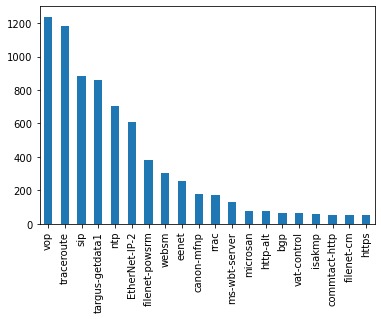

In [ ]:
# visualising top 20 source traffic types
new_df['s_traffic_type'].value_counts()[:20].plot(kind = 'bar')

<AxesSubplot:>

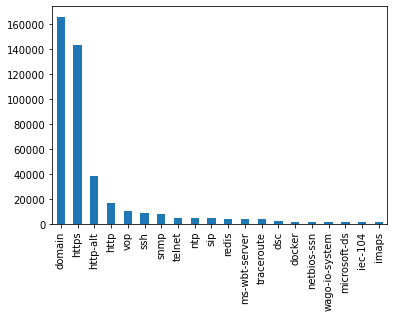

In [ ]:
# visualising top 20 destination traffic types
new_df['d_traffic_type'].value_counts()[:20].plot(kind = 'bar')

In [ ]:
# export analytical file for visualization
new_df.to_csv('new_sample.csv')

## TOTAL BYTES BY UNIQUE IP ADDRESSES

In [ ]:
# total bytes by unique clients; source + desitination bytes
new_df.groupby('sa').sum().total_bytes

sa
0.0.0.0                      3680878
1.0.0.1                         4136
1.1.1.1                        14532
1.116.202.147                   1136
1.116.67.192                     308
                              ...   
fe80::ce2d:e0ff:fe02:b795      11448
fe80::ce2d:e0ff:fe02:b79f      19200
fe80::d                         3772
fe80::d843:b9ff:fe7a:930c         56
fe80::e2db:55ff:fefe:3b89        504
Name: total_bytes, Length: 17071, dtype: int64

In [ ]:
totalbytes_df = new_df.groupby('sa', as_index = False)['total_bytes'].sum()

In [ ]:
totalbytes_df

,sa,total_bytes
0,0.0.0.0,3680878
1,1.0.0.1,4136
2,1.1.1.1,14532
3,1.116.202.147,1136
4,1.116.67.192,308
...,...,...
17066,fe80::ce2d:e0ff:fe02:b795,11448
17067,fe80::ce2d:e0ff:fe02:b79f,19200
17068,fe80::d,3772
17069,fe80::d843:b9ff:fe7a:930c,56


A 0.0. 0.0 address indicates the client isn't connected to a TCP/IP network, and a device may give itself a 0.0. 0.0 address when it is offline.

1.1. 1.1 is a public DNS resolver operated by Cloudflare that offers a fast and private way to browse the Internet. Unlike most DNS resolvers, 1.1. 1.1 does not sell user data to advertisers.

## TOTAL MAC by IP Address

In [ ]:
# mac by source IP address; number of macs under each unique IP address
new_df.groupby('sa').count().ismc

sa
0.0.0.0                      3
1.0.0.1                      9
1.1.1.1                      6
1.116.202.147                2
1.116.67.192                 5
                            ..
fe80::ce2d:e0ff:fe02:b795    1
fe80::ce2d:e0ff:fe02:b79f    1
fe80::d                      1
fe80::d843:b9ff:fe7a:930c    1
fe80::e2db:55ff:fefe:3b89    1
Name: ismc, Length: 17071, dtype: int64

In [ ]:
sa_df = new_df.groupby('sa').count().ismc

In [ ]:
# each sa IP address is a unique client, total we have 433 clients using Jame's internet service
sa_df.nunique()

432

In [ ]:
mac_df = new_df.groupby('sa', as_index = False)['ismc'].count()

In [ ]:
mac_df.head()

,sa,ismc
0,0.0.0.0,3
1,1.0.0.1,9
2,1.1.1.1,6
3,1.116.202.147,2
4,1.116.67.192,5


In [ ]:
mac_df.sort_values(by='ismc', ascending=False)

,sa,ismc
16648,92.63.197.23,39205
10057,208.66.251.130,28481
7171,192.139.120.53,26740
10098,208.66.251.42,23105
10022,208.66.250.77,18818
...,...,...
2602,13.111.66.1,1
2601,13.111.66.0,1
10294,209.148.131.12,1
2600,13.111.250.34,1


## Protoccols and Flags

In [ ]:
pr_df = new_df[['sa', 'pr', 'flg', 'total_bytes']].copy()

In [ ]:
pr_df.head()

,sa,pr,flg,total_bytes
0,114.55.236.65,TCP,......S.,60
1,192.139.156.122,UDP,........,5860
2,185.173.35.1,TCP,......S.,44
3,40.114.10.250,UDP,........,1289
4,208.66.251.42,TCP,...A..S.,11568


In [ ]:
# number of unique flags
pr_df.nunique().flg

173

In [ ]:
# number of unique protoccols
pr_df.nunique().pr

10

In [ ]:
groupedpr_df = pr_df.groupby('pr', as_index=True).agg({'sa': 'count', 'total_bytes': 'sum'})
groupedpr_df.head(10)

,sa,total_bytes
pr,,
ESP,72,613211996
GRE,565,1102549077
ICMP,34301,25869330
ICMP6,7,1064
IGMP,1,384
IPIP,2,1317040
IPv6,2,61688
TCP,420727,37698610358
UDP,219210,127129854086


In [ ]:
# export for visualization
groupedpr_df.to_csv('protoccol.csv')

In [ ]:
groupedpr_df2 = pr_df.groupby(['pr', 'flg']).agg({'sa': 'count', 'total_bytes': 'sum'})
groupedpr_df2.sample(50)

sa  total_bytes
pr   flg                          
TCP  C..A..S.     167       289688
     C.UA..SF     163       165888
     ..UA.R.F       1          108
     .EUAP.S.     189       261409
     ...A..SF   12894   3230629928
     ....PRS.     159       269032
     CE...RSF     166       396240
     ..UAPR.F       3        11624
     CEUA..SF     154       339532
     .E.A.RS.     168       288760
     ..UAPR..       1          468
     CE...RS.     160       287152
     CE.AP.SF     369     79205646
IPIP ........       2      1317040
TCP  C.....SF     145       240220
     C.UA.RSF     155       344256
     .EUA..S.     158       152104
     C..AP.S.     177       424525
     ...A.R.F     104        38090
     CEU.PRS.     178       333992
     C.UAPR..       2        14607
     .EUA.RS.     177       321552
     CEU.....       1          272
     .EU.PRS.     177       313068
     .E.A..S.     156       286252
     ..UA.RS.     180       266615
     ....P.S.     150       153148
     ..UA..S.     183       251236
     C.UA.RS.     169       238939
     ....P.SF     190       326400
     C...PRSF     168       193464
     CEU.PRSF     152       325900
     .EUA.RSF     162       363207
     .E.A...F       1         4439
     ......S.  137113     13968450
     CEUAP...       1         7582
     ...APR.F     116       341947
     ..U..RSF     141       226080
     .E.AP...       1         2319
     C....RS.     168       210676
     ..UA..SF    3365      3073204
     CE.AP.S.    1889    176857737
     ..U..RS.     156       273992
     CEU...SF     168       281088
     CEUA.RS.     186       291229
     .E..PRSF     149       298520
     .EU..RS.     161       253192
     ...AP.S.   14979   7060109851
     .EU.P.S.     174       221740
     C.UAPRSF     171       566486

In [ ]:
# export for visualization
groupedpr_df2.to_csv('prflg.csv')

## Drill Down: IP, td, MAC, Total Bytes

In [ ]:
new_df.head()

,ts,te,s_traffic_type,d_traffic_type,td,sa,da,sp,dp,pr,...,end_date,end_time,total_bytes,byte_per_sec,out_byte_per_opkt,in_byte_per_ipkt,byte_delivery_ratio,pkt_delivery_datio,d_traffic_code,s_traffic_code
0,2022-02-08 18:54:00,2022-02-08 18:54:00,NaN,redis,0.00,114.55.236.65,192.139.158.108,52478,6379,TCP,...,2022-02-08,18:54:00,60,inf,NaN,60.000000,inf,inf,6379tcp,52478tcp
1,2022-02-08 18:42:00,2022-02-08 18:42:00,NaN,https,0.08,192.139.156.122,142.251.45.2,50841,443,UDP,...,2022-02-08,18:42:00,5860,250.0,288.6,297.400000,1.030492,1.000000,443udp,50841udp
2,2022-02-08 18:41:00,2022-02-08 18:41:00,NaN,dynamid,0.00,185.173.35.1,192.139.158.39,34247,9002,TCP,...,2022-02-08,18:41:00,44,inf,NaN,44.000000,inf,inf,9002tcp,34247tcp
3,2022-02-08 18:37:00,2022-02-08 18:37:00,NaN,sip,0.00,40.114.10.250,192.139.120.76,57303,5060,UDP,...,2022-02-08,18:37:00,1289,inf,576.0,713.000000,1.237847,1.000000,5060udp,57303udp
4,2022-02-08 18:43:00,2022-02-08 18:43:00,NaN,https,0.02,208.66.251.42,20.190.139.171,32518,443,TCP,...,2022-02-08,18:43:00,11568,1250.0,536.0,369.454545,0.541578,0.785714,443tcp,32518tcp


In [ ]:
# new dataframe
df2 = new_df[['sa', 'total_bytes', 'td', 'ismc']].copy()

In [ ]:
df2.head()

,sa,total_bytes,td,ismc
0,114.55.236.65,60,0.00,c4:ad:34:51:33:93
1,192.139.156.122,5860,0.08,00:00:00:00:00:00
2,185.173.35.1,44,0.00,c4:ad:34:51:33:93
3,40.114.10.250,1289,0.00,c4:ad:34:51:33:93
4,208.66.251.42,11568,0.02,00:00:5e:00:01:0b


In [ ]:
df2.dtypes

sa              object
total_bytes      int64
td             float64
ismc            object
dtype: object

In [ ]:
# new aggregated dataframe
df3 = df2.groupby('sa', as_index=True).agg({'total_bytes': 'sum', 'td':'sum', 'ismc': 'count'})

In [ ]:
df3.head()

,total_bytes,td,ismc
sa,,,
0.0.0.0,3680878,4214.06,3
1.0.0.1,4136,1368.40,9
1.1.1.1,14532,3840.02,6
1.116.202.147,1136,3.05,2
1.116.67.192,308,673.00,5


In [ ]:
# renaming columns
df3.rename(columns = {'td':'total_td', 'ismc':'count_ismc'}, inplace = True)

In [ ]:
df3.head()

,total_bytes,total_td,count_ismc
sa,,,
0.0.0.0,3680878,4214.06,3
1.0.0.1,4136,1368.40,9
1.1.1.1,14532,3840.02,6
1.116.202.147,1136,3.05,2
1.116.67.192,308,673.00,5


In [ ]:
# average bytes per mac in a IP
df3['avg_bytes_per_mac'] = df3['total_bytes']/df3['count_ismc']

In [ ]:
df3.head()

,total_bytes,total_td,count_ismc,avg_bytes_per_mac
sa,,,,
0.0.0.0,3680878,4214.06,3,1.226959e+06
1.0.0.1,4136,1368.40,9,4.595556e+02
1.1.1.1,14532,3840.02,6,2.422000e+03
1.116.202.147,1136,3.05,2,5.680000e+02
1.116.67.192,308,673.00,5,6.160000e+01


In [ ]:
df3.dtypes

total_bytes            int64
total_td             float64
count_ismc             int64
avg_bytes_per_mac    float64
dtype: object

In [ ]:
df3['bytes_per_second']=df3['total_bytes']/df3['total_td']

In [ ]:
df3.sample(50)

,total_bytes,total_td,count_ismc,avg_bytes_per_mac,bytes_per_second
sa,,,,,
74.125.40.3,231,0.36,1,231.000000,6.416667e+02
172.253.245.5,213,0.40,1,213.000000,5.325000e+02
5.135.173.116,180,0.00,3,60.000000,inf
185.26.206.53,116,3.00,1,116.000000,3.866667e+01
151.106.1.55,1735,0.01,10,173.500000,1.735000e+05
180.149.126.144,120,0.00,3,40.000000,inf
69.112.106.211,108,0.99,1,108.000000,1.090909e+02
208.66.251.3,665522941,55397.64,1509,441035.746190,1.201356e+04
35.80.48.126,429,0.12,2,214.500000,3.575000e+03


In [ ]:
# export processed data for visualization
df3.to_csv('data.csv')

In [ ]:
df3.sort_values(by=['total_bytes'], ascending=False, inplace = True)
df3.sample(50)

,total_bytes,total_td,count_ismc,avg_bytes_per_mac,bytes_per_second
sa,,,,,
60.218.172.225,120,0.00,2,6.000000e+01,inf
52.81.246.205,396,0.00,11,3.600000e+01,inf
163.171.149.76,156,0.00,1,1.560000e+02,inf
90.150.21.34,256,0.00,4,6.400000e+01,inf
192.168.86.21,220,0.00,5,4.400000e+01,inf
218.56.209.4,120,3.00,1,1.200000e+02,4.000000e+01
185.153.179.102,438784,275.20,7,6.268343e+04,1.594419e+03
192.139.120.117,844,48.88,9,9.377778e+01,1.726678e+01
124.253.129.162,129,0.00,1,1.290000e+02,inf


In [ ]:
df3.describe()

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,total_bytes,total_td,count_ismc,avg_bytes_per_mac,bytes_per_second
count,1.707100e+04,1.707100e+04,17071.000000,1.707100e+04,1.707100e+04
mean,9.757665e+06,5.079986e+03,39.536172,3.309739e+06,inf
std,2.201133e+08,2.890629e+05,619.693841,8.619605e+07,NaN
min,2.800000e+01,0.000000e+00,1.000000,2.800000e+01,6.090258e-02
25%,1.150000e+02,0.000000e+00,1.000000,5.600000e+01,1.004909e+02
50%,3.350000e+02,5.000000e-02,2.000000,1.329457e+02,1.240000e+04
75%,1.509500e+03,1.801000e+01,6.000000,2.730000e+02,NaN
max,2.053199e+10,2.643703e+07,39205.000000,6.591538e+09,inf


## Correlation

Using new sample dataframe (df3) total bytes, duration, count of ismc,  and average bytes per ismc

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
corr = df3.corr()
corr

,total_bytes,total_td,count_ismc,avg_bytes_per_mac,bytes_per_second
total_bytes,1.000000,0.053371,0.224845,0.441871,0.210322
total_td,0.053371,1.000000,0.419648,-0.000434,-0.001953
count_ismc,0.224845,0.419648,1.000000,-0.002267,-0.005277
avg_bytes_per_mac,0.441871,-0.000434,-0.002267,1.000000,0.422262
bytes_per_second,0.210322,-0.001953,-0.005277,0.422262,1.000000


<AxesSubplot:>

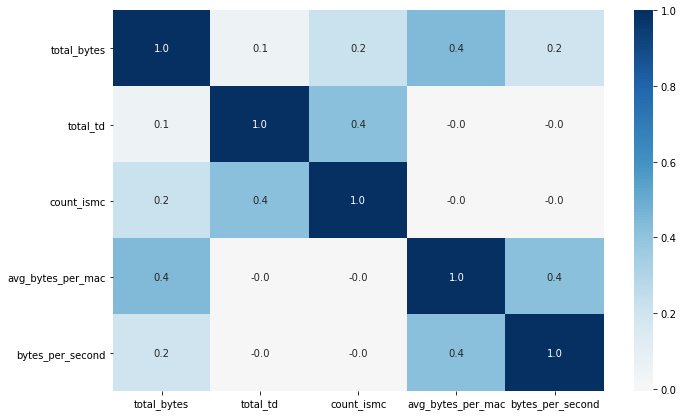

In [ ]:
#heatmap using seaborn
#If the correlation between variables if greater than 0.7 we can say that the two variables are highly correlated. 
#From the above table, the pairs of highly correlated variables are:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

## For Additional Visualization: Distribution of Total Bytes

In [ ]:
df_dist = df2
df_dist.head()

,sa,total_bytes,td,ismc
0,114.55.236.65,60,0.00,c4:ad:34:51:33:93
1,192.139.156.122,5860,0.08,00:00:00:00:00:00
2,185.173.35.1,44,0.00,c4:ad:34:51:33:93
3,40.114.10.250,1289,0.00,c4:ad:34:51:33:93
4,208.66.251.42,11568,0.02,00:00:5e:00:01:0b


In [ ]:
df_dist2 = df_dist.groupby(['ismc', 'sa']).agg({'total_bytes': 'sum'})
df_dist2.sample(30)

total_bytes
ismc              sa                          
c4:ad:34:51:33:93 201.217.212.182           52
                  201.144.20.130            40
00:00:5e:00:01:01 10.64.0.171             6840
c4:ad:34:51:33:93 74.125.80.143            843
cc:2d:e0:02:b7:93 199.101.132.35          1334
c4:ad:34:51:33:93 193.3.53.5              1176
74:4d:28:64:76:9c 54.164.25.6               84
c4:ad:34:51:33:93 111.193.235.11            40
                  74.125.46.139            277
                  119.7.130.40              40
                  103.203.138.185          222
                  104.33.72.125             44
cc:2d:e0:02:b7:93 192.139.156.17           480
c4:ad:34:51:33:93 218.50.134.18             40
                  208.66.253.163           932
                  192.99.175.183           120
cc:2d:e0:02:b7:93 222.186.180.130           40
c4:ad:34:51:33:93 104.140.188.38          6398
00:00:5e:00:01:2a 192.139.120.77       1389997
00:00:00:00:00:00 10.50.64.250       902278887
c4:ad:34:51:33:93 192.139.122.147         1892
                  70.70.101.74           33480
                  108.180.207.156        12108
                  35.141.35.129             40
cc:2d:e0:02:b7:93 78.140.128.106          1218
c4:ad:34:51:33:93 74.125.112.2             291
                  185.46.163.163           908
                  189.7.158.151            108
                  27.38.193.122            180
                  162.142.125.119           44

In [ ]:
# export processed data for visualization
df_dist2.to_csv('dist2.csv')

# Segmentation

In [ ]:
!pip install squarify

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
#Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify

## Segmentation Modeling

In [ ]:
# Frequency = count of ts occurrences
# Usage = Total bytes in and out
# MAC = count of ismc


#Create Segmentation Modelling scores for each customer
Scores = new_df.groupby('sa').agg({'ismc': lambda x: len(set(x)), 'ts': lambda x: len(set(x)), 'total_bytes': lambda x: x.sum()})

#Convert Invoice Date into type int
Scores['ts'] = Scores['ts'].astype(int)

#Rename column names to Usage, Frequency and MAC
Scores.rename(columns={'ts': 'Frequency', 
                         'total_bytes': 'Usage', 
                         'ismc': 'MAC'}, inplace=True)

Scores.reset_index().head()

,sa,MAC,Frequency,Usage
0,0.0.0.0,2,2,3680878
1,1.0.0.1,2,5,4136
2,1.1.1.1,3,4,14532
3,1.116.202.147,1,2,1136
4,1.116.67.192,1,5,308


In [ ]:
#Descriptive Statistics (Usage)
Scores.describe()

,MAC,Frequency,Usage
count,17071.000000,17071.000000,1.707100e+04
mean,1.259329,3.903755,9.757665e+06
std,0.730094,5.616179,2.201133e+08
min,1.000000,1.000000,2.800000e+01
25%,1.000000,1.000000,1.150000e+02
50%,1.000000,1.000000,3.350000e+02
75%,1.000000,4.000000,1.509500e+03
max,10.000000,27.000000,2.053199e+10


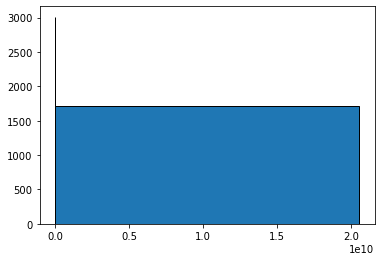

(array([2.80000000e+01, 4.00000000e+01, 8.00000000e+01, 1.32000000e+02,
        2.07000000e+02, 3.35000000e+02, 5.64000000e+02, 1.18070000e+03,
        2.92320000e+03, 1.57852000e+04, 2.05319945e+10]),
 array([ 118., 3012., 1952., 1731., 1721., 1670., 1746., 1707., 1707.,
        1707.]))

In [ ]:
#define function to calculate equal-frequency bins 
x = Scores['Usage']

def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(x, equalObs(x, 10), edgecolor='black')
plt.show()

#display bin boundaries and frequency per bin 
bins, n

In [ ]:
df = pd.DataFrame(data = n)
print(df)
df.to_csv('usage_freq.csv')

        0
0   118.0
1  3012.0
2  1952.0
3  1731.0
4  1721.0
5  1670.0
6  1746.0
7  1707.0
8  1707.0
9  1707.0


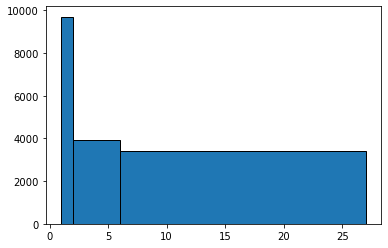

(array([ 1.,  1.,  1.,  2.,  6., 27.]),
 array([   0.,    0., 9703., 3945., 3423.]))

In [ ]:
#define function to calculate equal-frequency bins 
x = Scores['Frequency']

def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(x, equalObs(x, 5), edgecolor='black')
plt.show()

#display bin boundaries and frequency per bin 
bins, n

In [ ]:
df = pd.DataFrame(data = bins)

print(df)
df.to_csv('frequency_freq.csv')

      0
0   1.0
1   1.0
2   1.0
3   2.0
4   6.0
5  27.0


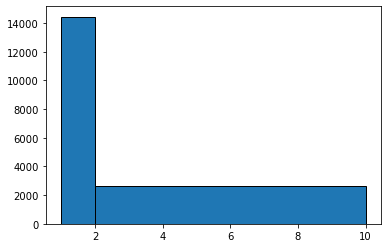

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2., 10.]),
 array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        14445.,  2626.]))

In [ ]:
#define function to calculate equal-frequency bins 
x = Scores['MAC']

def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(x, equalObs(x, 10), edgecolor='black')
plt.show()

#display bin boundaries and frequency per bin 
bins, n

In [ ]:
df = pd.DataFrame(data = bins)

print(df)
df.to_csv('mac_freq.csv')

       0
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    2.0
10  10.0


In [ ]:
#Split into four segments using quantiles
quantiles = Scores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'MAC': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 4.0},
 'Usage': {0.25: 115.0, 0.5: 335.0, 0.75: 1509.5}}

In [ ]:
# Functions to create Usage, Frequency and MAC segments
def UFMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
#Calculate and Add U, F and M segment value columns in the existing dataset to show U, F and M segment values
Scores['U'] = Scores['Usage'].apply(UFMScoring, args=('Usage',quantiles,))
Scores['F'] = Scores['Frequency'].apply(UFMScoring, args=('Frequency',quantiles,))
Scores['M'] = Scores['MAC'].apply(UFMScoring, args=('MAC',quantiles,))
Scores.head()

,MAC,Frequency,Usage,U,F,M
sa,,,,,,
0.0.0.0,2,2,3680878,4,3,4
1.0.0.1,2,5,4136,4,4,4
1.1.1.1,3,4,14532,4,3,4
1.116.202.147,1,2,1136,3,3,1
1.116.67.192,1,5,308,2,4,1


In [ ]:
#Calculate and Add UFMGroup value column showing combined concatenated score of UFM
Scores['UFMGroup'] = Scores.U.map(str) + Scores.F.map(str) + Scores.M.map(str)

#Calculate and Add UFMScore value column showing total sum of UFMGroup values
Scores['UFMScore'] = Scores[['U', 'F', 'M']].sum(axis = 1)
Scores.head()

,MAC,Frequency,Usage,U,F,M,UFMGroup,UFMScore
sa,,,,,,,,
0.0.0.0,2,2,3680878,4,3,4,434,11
1.0.0.1,2,5,4136,4,4,4,444,12
1.1.1.1,3,4,14532,4,3,4,434,11
1.116.202.147,1,2,1136,3,3,1,331,7
1.116.67.192,1,5,308,2,4,1,241,7


In [ ]:
#Assign Value Level to each customer
Value_Level = ['No Value', 'Low', 'Medium', 'High']
Score_cuts = pd.qcut(Scores.UFMScore, q = 4, labels = Value_Level)
Scores['UFM_Value_Level'] = Score_cuts.values
Scores.reset_index().head()

,sa,MAC,Frequency,Usage,U,F,M,UFMGroup,UFMScore,UFM_Value_Level
0,0.0.0.0,2,2,3680878,4,3,4,434,11,High
1,1.0.0.1,2,5,4136,4,4,4,444,12,High
2,1.1.1.1,3,4,14532,4,3,4,434,11,High
3,1.116.202.147,1,2,1136,3,3,1,331,7,Medium
4,1.116.67.192,1,5,308,2,4,1,241,7,Medium


In [ ]:
#Validate the data for UFMGroup = 111
Scores[Scores['UFMGroup']=='111'].sort_values('Usage', ascending=False).reset_index().head(10)

,sa,MAC,Frequency,Usage,U,F,M,UFMGroup,UFMScore,UFM_Value_Level
0,116.62.238.215,1,1,114,1,1,1,111,3,No Value
1,62.16.46.163,1,1,113,1,1,1,111,3,No Value
2,188.27.130.160,1,1,113,1,1,1,111,3,No Value
3,173.212.81.209,1,1,112,1,1,1,111,3,No Value
4,176.119.229.109,1,1,112,1,1,1,111,3,No Value
5,70.180.42.186,1,1,112,1,1,1,111,3,No Value
6,54.87.63.114,1,1,112,1,1,1,111,3,No Value
7,93.142.249.204,1,1,112,1,1,1,111,3,No Value
8,110.74.146.135,1,1,112,1,1,1,111,3,No Value
9,49.142.143.36,1,1,112,1,1,1,111,3,No Value


In [ ]:
# Define ufm_level function
def ufm_level(df):
    if df['UFMScore'] >= 10:
        return 'Require Upgrade'
    elif ((df['UFMScore'] >= 7) and (df['UFMScore'] < 10)):
        return 'Potential Sales'
    elif ((df['UFMScore'] >= 4) and (df['UFMScore'] < 7)):
        return 'Needs Attention'
    else:
        return 'Possible Customer Loss'

# Create a new variable UFM_Level
Scores['UFM_Level'] = Scores.apply(ufm_level, axis=1)
# Print the header with top 5 rows to the console
Scores.head()

,MAC,Frequency,Usage,U,F,M,UFMGroup,UFMScore,UFM_Value_Level,UFM_Level
sa,,,,,,,,,,
0.0.0.0,2,2,3680878,4,3,4,434,11,High,Require Upgrade
1.0.0.1,2,5,4136,4,4,4,444,12,High,Require Upgrade
1.1.1.1,3,4,14532,4,3,4,434,11,High,Require Upgrade
1.116.202.147,1,2,1136,3,3,1,331,7,Medium,Potential Sales
1.116.67.192,1,5,308,2,4,1,241,7,Medium,Potential Sales


In [ ]:
# Calculate average values for each UFM_Level, and return a size of each segment 
ufm_level_agg = Scores.groupby('UFM_Level').agg({
    'Usage': 'mean',
    'Frequency': 'mean',
    'MAC': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(ufm_level_agg)

                             Usage Frequency  MAC      
                              mean      mean mean count
UFM_Level                                              
Needs Attention          6663759.4       1.3  1.0  7039
Possible Customer Loss        52.8       1.0  1.0  3816
Potential Sales          7319169.4       7.3  1.1  4121
Require Upgrade         42722865.4      11.3  2.8  2095


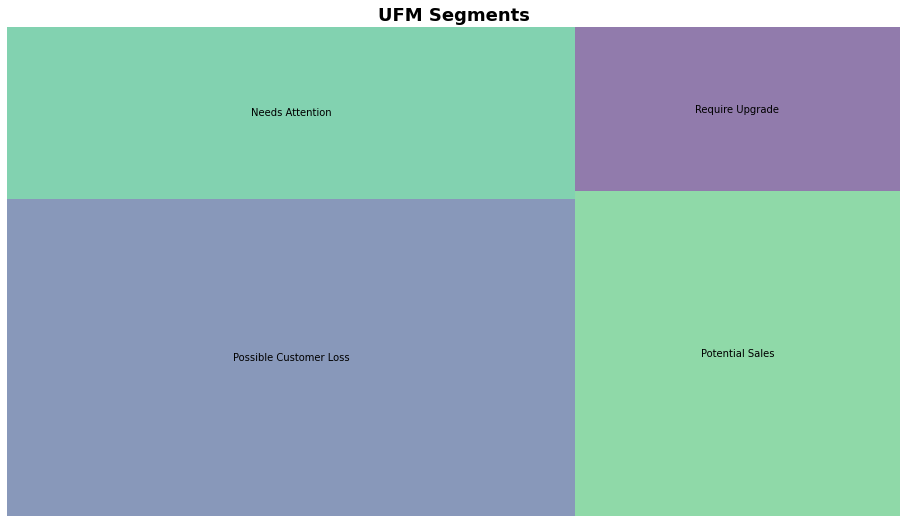

In [ ]:
ufm_level_agg.columns = ['UsageMean','FrequencyMean','MACMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=ufm_level_agg['Count'], 
              label=['Possible Customer Loss',
                     'Needs Attention',
                     'Potential Sales',
                     'Require Upgrade'], alpha=.6 )
plt.title("UFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
Scores.to_csv('segments.csv')